# Kickstarter Analysis

Kickstarter (https://www.kickstarter.com) has established itself as the leading platform for funding creative
ventures. Aspiring entrepreneurs in the arts can initiate fundraising campaigns on Kickstarter to support their
projects. Some projects have been hugely successful, whereas many others have fallen well short of their
fundraising objectives. 
- This Notebook contains a data analysis for a sample data over 4000 Kickstarter fundraising campaigns. Through analysis and visualization, Inferences are made to present to the client who wants to use Kickstarter platform.



First, three libraries are imported to help us perform various analysis and visualizations. matplotlib.pyplot module contains the Matplotlib library’s graphing capabilities that we use.  This module typically is imported with the name plt.The NumPy (Numerical Python) library includes the function unique that we’ll use to summarize our analysis.The numpy module typically is imported as np. The seaborn module contains the Seaborn library’s graphing capabilities we use.This module typically is imported with the name sns. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Analysis of amount pledged

In order to begin our analysis, we first import the column that contains all the amount pledged. We use a Numpy library called np.loadtxt to load the column. This library accepts several arguments and one of the arguments it accepts is named "usecols". The argument "usecols" determines Which columns to read, with 0 being the first. Amount pledged is located on column 3 so we place number 3, usecols = (3). We also use "skiprows" argument in order to skip the first row because it is not relevant to our analysis. And finally, we put string in data type or dtype argument to import the desired column in string format.

In [ ]:
# Import amount pledged in order to perform analysis for Kickstarter fundraising platform.

amount_pledged = np.loadtxt('D:\python\HW3_kickstarter.csv', skiprows=1, dtype = 'str', delimiter=",",usecols = (3))

- We start our analysis by evaluating various descriptive statistics for the amount pledged. Here, we use array attribute, universal function and aggregate functions to determine statistical values.

   - Array attribute used: size 
   - Aggregate functions used: min(), max(), mean(), median(), std()
   - Universal function used: np.median(array_name)

In [ ]:
# Determine various descriptive statstics of amount pledged in order to perform analysis for Kickstarter platform.

print(f'The total number of projects is: {amount_pledged.size}')
amount_pledged =amount_pledged.astype(float)
print(f'The maximum amount of pledged is: {amount_pledged.min():.2f}')
print(f'The minimum amount of pledged is: {amount_pledged.max():.2f}')
print(f'The mean of total amount of pledged is: {amount_pledged.mean():.2f}')
print(f'The median of total amount of pledged is: {np.median(amount_pledged):.2f}')
print(f'The standard deviation of total amount of pledged is: {amount_pledged.std():.2f}')

The total number of projects is: 4184
The maximum amount of pledged is: 0.00
The minimum amount of pledged is: 240351.91
The mean of total amount of pledged is: 1338.72
The median of total amount of pledged is: 90.00
The standard deviation of total amount of pledged is: 7001.05


- We can determine the percentage of projects that earned a total pledges of at least $2500. We can do this by using aggregate function sum(), and then use division and multiplication to calculate percentage.

In [ ]:
# Determine percentage of projects that earned total pledges of at least $2,500 inorder to help make analysis for Kickstarter platform

pledges_atleast = amount_pledged < 2500
percentages_of_projects = (pledges_atleast.sum()/amount_pledged.sum())*100
print(f'The percentage of projects that earned total pledges of at least $2500 is {percentages_of_projects:.2f}%')


The percentage of projects that earned total pledges of at least $2500 is 0.07%


## Analysis of project categories

In order to start analysis on project categories, we import the column that contains the project categories. This column's order is in the 12fth order so we put usecols = (12)

In [ ]:
# Load the project categories data in order to continue our analysis on Kickstarter platform.

imported_categories = np.loadtxt('D:\python\HW3_kickstarter.csv', skiprows=1, dtype = 'str', delimiter=",", usecols=(12))

- We can determine the number of categories and their respective frequencies by using Numpy's "unique" function.

In [ ]:
# Determine the values and respective frequencies of project categories inorder to visualize it.

values_category, frequency_category = np.unique(imported_categories, return_counts=True)
print(imported_categories)

['Conceptual Art' 'Conceptual Art' 'Conceptual Art' ... 'Painting'
 'Painting' 'Painting']


### Creating the Bar Plot


Let’s create the bar plot’s title, set its style, then graph the project categories and their respective frequencies. 
 

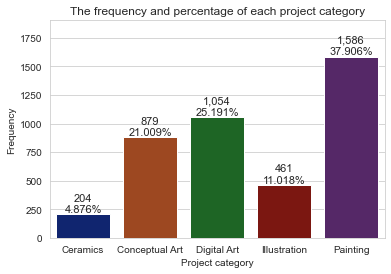

In [ ]:
# Plot barplot of the frequency and percentage of each project category in order to visualize our analysis for kickstarter platform

title = f'The frequency and percentage of each project category'
sns.set_style('whitegrid')
axes = sns.barplot(x=values_category, y=frequency_category, palette='dark')
axes.set_title(title)
axes.set(xlabel='Project category', ylabel='Frequency')
axes.set_ylim(top=max(frequency_category) * 1.20)
for bar, frequency in zip(axes.patches, frequency_category):
    text_x = bar.get_x() + bar.get_width() / 2.0
    text_y = bar.get_height()
    text = f'{frequency:,}\n{frequency/ len(imported_categories):.3%}'
    axes.text(text_x, text_y, text,
    fontsize=11, ha='center', va='bottom')

- The first line in the above code contains the title to be displayed on top of the bar plot. By default, Seaborn plots graphs on a plain white background, but it provides several styles to choose from ('darkgrid', 'whitegrid', 'dark', 'white' and 'ticks'). We use dark style in the plot. Line two specifies the 'whitegrid' style, which displays light-gray horizontal lines in the vertical bar plot.

- The third line graphs the each category frequencies using Seaborn’s barplot function.
- The fourth line uses the axes object’s set_title method to display the title string centered above the plot.The fifth line add labels to each axes.
- To make room for the text above the bars, line six scales the y-axis by 20%
- Line seven and the remaining lines display each bar’s frequency value and percentage of each
categories

#### Inferences from the above barplot

- Painting category has the most number of projects which tells us that most of the people that use kickstarter campaign for fundraising are painters.
  - Kickstarter platform is most popular among entrepreneurs who are painters.
- People who do Ceramics are the least of entrepreneurs that use kickstarter for fundraising campaigns.
  - Kickstarter platform is least poplular among those who do Ceramics.

## Analysis of Project's state 
- We can do more analysis by importing state column.

In [ ]:
#Load the project's states data in order to do more analysis and visualization for Kickstarter platform.

imported_states = np.loadtxt('D:\python\HW3_kickstarter.csv', skiprows=1, dtype = 'str', delimiter=",", usecols=(4))

- We begin our analysis by converting successful values from state column to boolean values of "True" to help us determine all the successful projects.
   - Successful = True
   - Unsuccessful, cancelled, failed, live = False
- We start by converting all the successful values to 1 and the rest to 0.

In [ ]:
# For each project category in kickstarter platform, calculate the proportion (percentage) of projects that were successful so that we can visualize the success percentages of each project for Kickstarter platform.

new_lst = []
for state in imported_states:
    if state=="successful":
        new_lst.append(1)
    else:
        new_lst.append(0)
        
# Convert values in new list to booleans in order to use boolean filtering to filter all successful/true values from projects

success_state = np.array(new_lst, dtype=bool)

# Use conditional filtering to filter true values to determine all the projects that are successful in Kickstarter platform

projects_successful = imported_categories[success_state]

# Filter unique values of projects that are only successful and calculate their frequency in order to create visualization for successful projects.

success_values, success_frequencies = np.unique(projects_successful, return_counts=True)

- We display barplot for successful projects. Unsuccessful projects are not shown in the bar plot

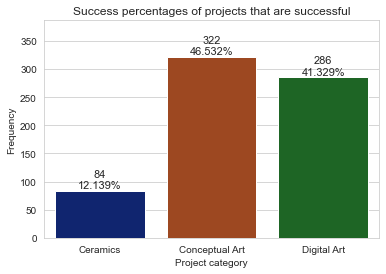

In [ ]:
# Dislay the bar plot of success percentages of projects in kickstarter platform to help visualize and make inferences.

title = f'Success percentages of projects that are successful'
sns.set_style('whitegrid')
axes = sns.barplot(x=success_values, y=success_frequencies, palette='dark')
axes.set_title(title)
axes.set(xlabel='Project category', ylabel='Frequency')
axes.set_ylim(top=max(success_frequencies) * 1.20)
for bar, frequency in zip(axes.patches, success_frequencies):
    text_x = bar.get_x() + bar.get_width() / 2.0
    text_y = bar.get_height()
    text = f'{frequency:,}\n{frequency / len(projects_successful):.3%}'
    axes.text(text_x, text_y, text,
    fontsize=11, ha='center', va='bottom')


## Inference from the above plot
- The most successful project category is Conceptual art which almost accounts to half porportion of the total project's category success rates. We can hence infer that people believe in Conceptual Art and the domain could be profitable.
-Paining and Illustration have zero success percentages, and hence not in the graph. It is appropriate to infer that  And besides them, Ceramics have lowest success percentages compared to Conceptual art and Digital art. 


## Analysis of Staffpick and Spot light projects. 

Here we do analysis on staffpick and spotlight projects. This will help us determine which featured projects were more successful. We begin by importing staffpick and spotlight columns from the kickstarter csv file.

In [ ]:
# Load the staff pick and spotlight data from kickstarter csv file to make analysis on the success rate of each feature.

imported_staffpick = np.loadtxt('D:\python\HW3_kickstarter.csv', skiprows=1, dtype = 'str', delimiter=",", usecols=(8))
imported_spotlight = np.loadtxt('D:\python\HW3_kickstarter.csv', skiprows=1, dtype = 'str', delimiter=",", usecols=(13))

We can filter all the true values in each column and therefore determine the total number of projects that were staffpicks and spotlighted respectively.
  - We use the aggregate function sum() to determine aggregate values of each feature.

In [ ]:
# Determine the total number of projects that are staff picks and spotlight in kickstarter platform so that we can determine the success percentage of each feature

total_staffpicks = (imported_staffpick == 'TRUE')
print(f'The total number of projects that were staff picked are {total_staffpicked.sum()}.')
total_spotlighted = (imported_spotlight == 'TRUE')
print(f'The total number of projects that were spot lighted are {total_spotlighted.sum()}.')


The total number of projects that were staff picked are 224.
The total number of projects that were spot lighted are 692.


Inorder to determine the success percentage of each feature, let us use boolean filter that maps two arrays. we can create an array based on another array of Booleans. Each element in the original array is returned if the corresponding boolean scalar is True. An array copy is made. Success_state is a boolean array containing true and falses. True represent successful state, and False represents remaining states (Failed, Cancelled, live and suspended).

We then can do a percentage calculation using the new copy of array (successful_staffpicked_projects and successful_spotlighted_projects) by dividing each of them by the total number of projects of each feature respectively.

In [ ]:
# Determine the success percentage of spotlighted projects and staff picked projects in kickstarter platform

successful_staffpicked_projects = total_staffpicks[success_state]
print(f'The success percentage of projects that were staff picks is {(successful_staffpicked_projects.sum()/total_staffpicked.sum())*100:.2f}%')
successful_spotlighted_projects = total_spotlighted[success_state]
print(f'The success percentage of projects that were spot lighted is {(successful_spotlighted_projects.sum()/total_spotlighted.sum())*100:.2f}%')

The success percentage of projects that were staff picks is 72.77%
The success percentage of projects that were spot lighted is 100.00%


### Inference from the above calculation

- We can say that projects that were spot lighted are more associated with successful projects. This is because according to the data, projects that were spot lighted gained `100% success while projects that were staff picks gained 72.8% success. Therefore, we can infer that it is more advantageous to spotlight projects in order to hit fundraising goals.

## Analysis by country
- I have finally chosen to do analysis by country to determine which country was more successful in hitting the goal for Kickstarter fundraising project.

Let us begin by importing the column that contains countries.

In [ ]:
#Load country from kickstarter csv file to begin doing analysis.

imported_countries = np.loadtxt('D:\python\HW3_kickstarter.csv', skiprows=1, dtype = 'str', delimiter=",", usecols=(5))

- Here we determine all the successful countries using our success_state boolean array. We can then do a histogram to visualize the distribution of the successful countries.

In [ ]:
# Determine the success state of each country in order to make inferences on which country has the most successes. 

successful_countries = imported_countries[success_state]

- We use hist() function that is in matplotlib.pyplot module.
- we can use histogram as it quickly tells us the distribution of successes by country. It is easy to visualize, and also helps us make inferences quickly.

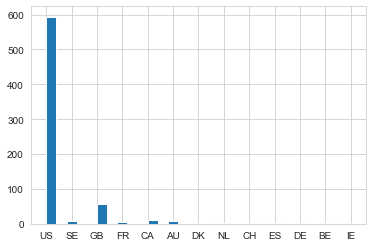

In [ ]:
# Use histogram to visualize the distribution of successes of each country.

plt.hist(successful_countries, 30)
plt.show()

### Inferece from the above histogram

- US has the highest success rate in fundraising. It is wise to maintain and also increase fundraising efforts across the United States. It is possible to add this quick note to the client.